<a href="https://colab.research.google.com/github/achalweise/Project-2/blob/main/Project_2_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


## Data Clean Up

In [38]:
house_prices = pd.read_csv('/content/HousePrices_HalfMil.csv')
house_prices.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [39]:
#Checking for duplicates
house_prices.duplicated().sum()
#deleting unnecessary columns 
house_prices = house_prices.drop(columns = ['Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble', 'Indian Marble', 'Floors', 'City', 'Solar', 'Electric', 'Fiber', 'Glass Doors', 'Swiming Pool', 'Garden'])

In [40]:
#identifying missing data 
house_prices.isna().sum()

Area      0
Prices    0
dtype: int64

In [41]:
mean_value = house_prices['Prices'].mean()
house_prices.fillna(value = mean_value, inplace = True)

In [42]:
#identifying inconsistencies 
house_prices.describe()

,Area,Prices
count,500000.000000,500000.000000
mean,124.929554,42050.139350
std,71.795363,12110.237201
min,1.000000,7725.000000
25%,63.000000,33500.000000
50%,125.000000,41850.000000
75%,187.000000,50750.000000
max,249.000000,77975.000000


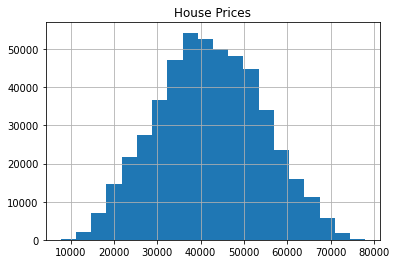

In [43]:
#producing a univariate visual
house_prices['Prices'].hist(bins=20)
plt.title('House Prices')
plt.show()

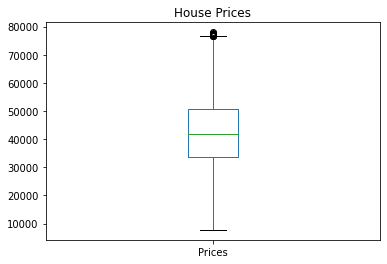

In [44]:
#identify Outliers
house_prices.boxplot(column = 'Prices', grid = False)
plt.title('House Prices')
plt.show()

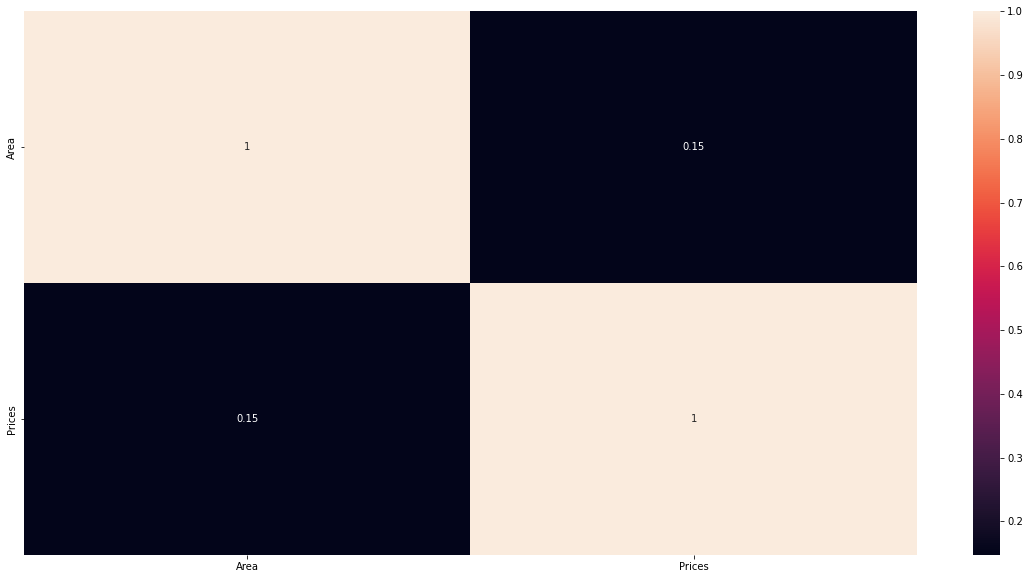

In [45]:
#Create a correlation heatmap
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(house_prices.corr(), annot=True, ax=ax);

In [50]:
X = house_prices.drop(columns = 'Prices')
y = house_prices['Prices']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [65]:

# quantitative features 
quant_feat = make_column_selector(dtype_include = 'number')

# Instantiate the column transformers 
encoder = OneHotEncoder(handle_unknown = 'ignore')

# Scale 
scaler = StandardScaler()

#mean imputer to impute values missing for the numeric columns
mean_imputer = SimpleImputer(strategy='mean')


In [54]:
num_processor = make_pipeline(mean_imputer, scaler)
cat_processor = make_pipeline(freq_imputer, encoder)

In [55]:
num_tuple = (num_processor, quant_feat)
cat_tuple = (cat_processor, cat_feat)

In [56]:
column_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

In [59]:
# KNN model 
# Instantiate 
knn = KNeighborsRegressor()

# Make the pipeline
knn_pipe = make_pipeline(column_transformer, knn)

# Fit 
knn_pipe.fit(X_train, y_train)

# Evaluation metrics on both the train and test sets. 
print('KNN Training RMSE:', np.sqrt(mean_squared_error(y_train, knn_pipe.predict(X_train))))
print('KNN Testing RMSE:', np.sqrt(mean_squared_error(y_test, knn_pipe.predict(X_test))))
print('------')
print('KNN Training R2:', r2_score(y_train, knn_pipe.predict(X_train)))
print('KNN Testing R2:', r2_score(y_test, knn_pipe.predict(X_test)))

KNN Training RMSE: 13064.943214725428
KNN Testing RMSE: 13059.431617493925
------
KNN Training R2: -0.16544581653603063
KNN Testing R2: -0.15825716313603122


In [61]:
knn_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb5816817d0>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb581681810>)

In [62]:
knn_params = {'kneighborsregressor__n_neighbors' : [5, 7, 9, 11],
              'kneighborsregressor__leaf_size' : [15, 20, 30]}

In [63]:
# Instantiate 
knn_gs = GridSearchCV(knn_pipe, knn_params)

knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb5816817d0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[

In [64]:
print('KNN_GS Training RMSE:', np.sqrt(mean_squared_error(y_train, knn_gs.predict(X_train))))
print('KNN_GS Testing RMSE:', np.sqrt(mean_squared_error(y_test, knn_gs.predict(X_test))))
print('------')
print('KNN_GS Training R2:', r2_score(y_train, knn_gs.predict(X_train)))
print('KNN_GS Testing R2:', r2_score(y_test, knn_gs.predict(X_test)))

KNN_GS Training RMSE: 12493.014019236849
KNN_GS Testing RMSE: 12513.974178737772
------
KNN_GS Training R2: -0.06564239274431793
KNN_GS Testing R2: -0.06352316156112026


In [67]:
# Random Tree Regressor 
rf = RandomForestRegressor(random_state = 42)
# Make the pipeline 
rf_pipe = make_pipeline(column_transformer, rf)
# Fit
rf_pipe.fit(X_train, y_train)

# Evaluation metrics on both train and test sets
print('RF Training RMSE:', np.sqrt(mean_squared_error(y_train, rf_pipe.predict(X_train))))
print('RF Testing RMSE:', np.sqrt(mean_squared_error(y_test, rf_pipe.predict(X_test))))
print('------')
print('RF Training R2:', r2_score(y_train, rf_pipe.predict(X_train)))
print('RF Testing R2:', r2_score(y_test, rf_pipe.predict(X_test)))

RF Training RMSE: 11966.288145678778
RF Testing RMSE: 12003.829579624447
------
RF Training R2: 0.022321765000174132
RF Testing R2: 0.02142056327972086


In [68]:
# view hyperparameters 
rf_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb5816817d0>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb581681810>)

In [69]:
# Define the hyperparameters 
rf_params = {'randomforestregressor__max_depth' : [None, 5],
             'randomforestregressor__min_samples_split' : [2, 4]}

In [71]:
# Instantiate 
rf_gs = GridSearchCV(rf_pipe, rf_params)
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb5816817d0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[

In [72]:
# Evaluation metrics 
print('RF_GS Training RMSE:', np.sqrt(mean_squared_error(y_train, rf_gs.predict(X_train))))
print('RF_GS Testing RMSE:', np.sqrt(mean_squared_error(y_test, rf_gs.predict(X_test))))
print('------')
print('RF_GS Training R2:', r2_score(y_train, rf_gs.predict(X_train)))
print('RF_GS Testing R2:', r2_score(y_test, rf_gs.predict(X_test)))

RF_GS Training RMSE: 11968.356805760095
RF_GS Testing RMSE: 12000.242692296328
------
RF_GS Training R2: 0.02198370549000095
RF_GS Testing R2: 0.022005298298631626


In [73]:
# Evaluation metrics on both the train and test sets. 
print('KNN Training RMSE:', np.sqrt(mean_squared_error(y_train, knn_pipe.predict(X_train))))
print('KNN Testing RMSE:', np.sqrt(mean_squared_error(y_test, knn_pipe.predict(X_test))))
print('------')
print('KNN Training R2:', r2_score(y_train, knn_pipe.predict(X_train)))
print('KNN Testing R2:', r2_score(y_test, knn_pipe.predict(X_test)))

KNN Training RMSE: 13064.943214725428
KNN Testing RMSE: 13059.431617493925
------
KNN Training R2: -0.16544581653603063
KNN Testing R2: -0.15825716313603122


Based on the hypertuned parameters, I would go with the Random Forest Regressor since it had a better R2 score and a lower RMSE. 
